In [15]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

(81, 5)
[0.9999999767771441, 2.999999401944479, 4.999989530390851, 6.999883168882483, 8.999060606903189]


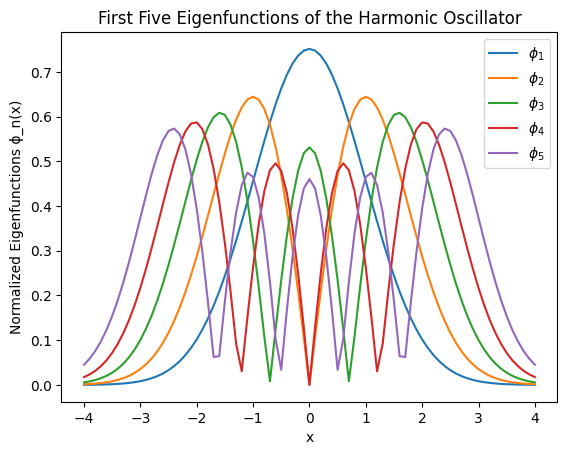

In [16]:
def bvp_rhs(y, x, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

# Initialization
tol = 1e-6
col = ['r', 'b', 'g', 'c', 'm', 'k']
x_step = 0.1
x_range = [-4, 4]
xshoot = np.linspace(x_range[0], x_range[1], int((x_range[1] - x_range[0]) / x_step) + 1)
A = 1
epsilon_list = [0.1]
eps_fun = []

epsilon_start = epsilon_list[0]
for i in range (1, 6):
    epsilon = epsilon_start
    depsilon = 0.2
    for j in range (10000):
        y0 = [A, np.sqrt(16 - epsilon)]
        y = odeint(bvp_rhs, y0, xshoot, args=(epsilon,))
        if abs(y[-1, 1] + np.sqrt(16 - epsilon) * y[-1, 0]) < tol:
            epsilon_list.append(epsilon)
            break
        if (-1) ** (i+1) * (y[-1, 1] + np.sqrt(16 - epsilon) * y[-1, 0]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    epsilon_start = epsilon + 0.1
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot)
    eps_fun.append(abs(y[:, 0]) / np.sqrt(norm))
    plt.plot(xshoot, eps_fun[-1], label=f'$\\phi_{i}$')
# print(eps_fun[-4:])
eigen_fun = np.column_stack(eps_fun)
A1 = eigen_fun
A2 = epsilon_list[-5:]
print(A1.shape)
print(A2)
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunctions ϕ_n(x)')
plt.title('First Five Eigenfunctions of the Harmonic Oscillator')
plt.legend()
plt.show()

In [17]:
import numpy as np
from scipy.linalg import eig
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.integrate import simpson

def shoot2(x, y, K, epsilon):
    return [y[1], (K * (x ** 2) - epsilon) * y[0]]

tol = 1e-4  # Define a tolerance level 
colors = ['r', 'b', 'g', 'c', 'm']  # Colors for plotting eigenfunctions
L = 4  # Boundary for y
yp = [-L, L] 
K = 1
yshoot = np.arange(yp[0], yp[1] + 0.1, 0.1)

eigenvalues = []  # List to store eigenvalues
eigenfunctions = []  # List to store eigenfunctions

epsilon_start = 0.2  # Starting value for epsilon
for mode in range(1, 6):  # Begin mode loop for the first five eigenfunctions
    epsilon = epsilon_start  # Initial guess for epsilon
    y0 = [1, np.sqrt(L ** 2 - epsilon)]
    depsilon = 0.1  # Step size for epsilon
    
    for _ in range(1000):  # Convergence loop for epsilon
        sol = solve_ivp(shoot2, [yshoot[0], yshoot[-1]], y0, t_eval=yshoot, args=(K, epsilon))
        
        # Check convergence condition
        if abs((sol.y[1, -1] + np.sqrt(L ** 2 - epsilon) * sol.y[0, -1]) - 0) < tol:
            eigenvalues.append(epsilon)  # Save the eigenvalue
            break
        # Update epsilon based on boundary condition behavior
        if (-1) ** (mode + 1) * (sol.y[1, -1] + np.sqrt(L ** 2 - epsilon) * sol.y[0, -1]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    # Adjust epsilon start for the next eigenvalue
    epsilon_start = epsilon + 2  
    
    # Normalize eigenfunction
    norm = np.trapz(sol.y[0] ** 2, yshoot)
    eigenfunc_norm = sol.y[0] / np.sqrt(norm)
    eigenfunctions.append(eigenfunc_norm)  # Save the normalized eigenfunction

# Output eigenvalues and eigenfunctions
eigenvalues = np.array(eigenvalues)
eigenfunctions = np.array(eigenfunctions)
abs_eigenfunctions = np.column_stack([np.abs(ef) for ef in eigenfunctions])

# Uncomment the following to see outputs
# print("Eigenvalues Hw2:")
# print(eigenvalues)
# print("\nEigenfunctions HW2:")
# for col in range(abs_eigenfunctions.shape[1]):
#     print(f"Mode {col+1} eigenfunction:")
#     print(abs_eigenfunctions[:, col])

A2_temp = eigenvalues
A1_temp = abs_eigenfunctions


#HOMEWORK 3
# Parameters
L = 4
dx = 0.1
K = 1
x = np.arange(-L, L+dx, dx)
N = len(x)
# Initialize the matrix A
A = np.zeros(((N-2), (N-2)))
print(A.shape)

# Construct matrix A with finite differences
for i in range(N - 2):
    
    A[i, i] = (-2) - (K * x[i+1]**2)*(dx**2)
    if i < (N-3):
        A[i + 1, i] = 1 
        A[i, i + 1] = 1 


A[0,0] = A[0,0] + (4/3)
A[0, 1] = A[0, 1] - (1/3)
A[-1, -1] = A[-1, -1] + (4/3)
A[-1, -2] = A[-1, -2] - (1/3)

# Solve the eigenvalue problem
eigenvalues, eigenfunctions = eigs(-A, k=5, which = "SM")
eigenvalues = np.real(eigenvalues)  # Ensure we're working with real parts only
eigenvalues = eigenvalues / (dx**2)

phi0 = np.array([(4/3)*eigenfunctions[0,:] - (1/3)*eigenfunctions[1,:]])
phiN = np.array([(4/3)*eigenfunctions[-1,:] - (1/3)*eigenfunctions[-2,:]])
eigenfunctions = np.real(np.vstack([phi0,eigenfunctions,phiN]))
print("real", eigenfunctions.shape)
#print(eigenfunctions.shape)

# Normalize the eigenfunctions using integration and take absolute values
for i in range(5):
    norm = np.trapz(eigenfunctions[:, i]**2, x)  # Integration over the range
    eigenfunctions[:, i] = abs(eigenfunctions[:, i] / np.sqrt(norm)) # Normalize


# Plot the eigenfunctions
#colors = ['r', 'b', 'g', 'c', 'm']
#plt.figure()
#for i in range(5):
    #plt.plot(x, eigenfunctions[:, i], colors[i], label=f"Mode {i+1}")


A4_temp = eigenvalues
A3_temp = eigenfunctions

# Show the plot
#plt.title("Eigenfunctions of Quantum Harmonic Oscillator")
#plt.xlabel("x")
#plt.ylabel("Normalized |ψ(x)|")
#plt.legend()
#plt.grid(True)
#plt.show()


#Part c

def shoot3(x, y, epsilon, gamma):
    return [y[1],  y[0]* (gamma* np.abs(y[0])**2 + (x**2) - epsilon)]


tol = 1e-6  # Define a tolerance level 

colors = ['r', 'b']  # Colors for plotting eigenfunctions

L = 2  # Boundary for y
yp = [-L, L] 
#yshoot = np.arange(yp[0], yp[1] + 0.1, 0.1)
dx = 0.1
x = np.arange(-L,L+dx, dx)
n = len(x)

EsolCpos, EsolCneg = np.zeros(2), np.zeros(2)
ysolCpos, ysolCneg = np.zeros((n,2)), np.zeros((n,2))


#for gamma
    #mode loop
        #A loop
            #epsilon
                #if conv
                #if e,de
        #if ||A|| = 1 stop
        #if A,dA

for gamma in [-0.05,0.05]:
    epsilon_start = 0.1
    A = 1e-6
    eigenfunctions = []
    eigenvalues = []
    #mode Loop
    for mode in range(1,3):  # Begin mode loop for the first five eigenfunctions
        dA = 0.01
        #A = 1e-6
        #A loop
        for j in range(1000):
            epsilon = epsilon_start
            depsilon = 0.2

            # epsilon loop
            for _ in range(1000):  
                y0 = [A, np.sqrt(L**2 - epsilon)*A] #inital condition on LHS
                sol = solve_ivp(lambda x,y: shoot3(x,y,epsilon,gamma), [x[0], x[-1]], y0, t_eval=x)
                #sol = solve_ivp(shoot3, [-L, L + dx], y0, t_eval=x, args=(epsilon, gamma))

                ys = sol.y.T
                xs = sol.t
        
                # Check convergence condition
                if abs((ys[-1, 1] + np.sqrt(L**2 - epsilon) * ys[-1, 0]) - 0) < tol:
                    #print(f"Found eigenvalue for mode {mode}: {epsilon}")
                    eigenvalues.append(epsilon)  # Save the eigenvalue
                    break

                # Update epsilon based on boundary condition behavior
                if (-1) ** (mode + 1) * (ys[-1, 1] + np.sqrt(L**2 - epsilon) * ys[-1, 0]) > 0:
                    epsilon += depsilon
                else:
                    #epsilon -= depsilon / 2
                    epsilon -= depsilon
                    depsilon /= 2

            area = np.trapz(ys[:, 0]**2, x=xs)
            if abs(area-1) < tol:
                break
            if area < 1:
                A = A + dA
            else:
                A = A - (dA/2)
                dA = dA/2
        # Adjust epsilon start for the next eigenvalue
        epsilon_start = epsilon + 0.2  
    
        # Normalize eigenfunction
        #norm = np.trapz(ys[:, 0]**2, x)
        #eigenfunc_norm = abs(ys[:, 0] / np.sqrt(norm))
        #eigenfunctions.append(eigenfunc_norm)  # Save the normalized eigenfunction

        # Plot the eigenfunction
        #plt.plot(x, eigenfunc_norm, colors[mode - 1], label=f"Mode {mode}")
        
        if gamma < 0:
            EsolCneg[mode-1] = epsilon
            ysolCneg[:,mode-1] = abs(ys[:,0])
        
        if gamma > 0:
            EsolCpos[mode-1] = epsilon
            ysolCpos[:,mode-1] = abs(ys[:,0])
        
A5_temp = ysolCpos
A6_temp = EsolCpos

A7_temp = ysolCneg
A8_temp = EsolCneg


# graph
#plt.plot(x, ysolCpos[:, 0], 'r', label='ϕ1')
#plt.plot(x, ysolCpos[:, 1], 'b', label='ϕ2')
#plt.plot(x, ysolCneg[:, 0], 'g', label='ϕ1')
#plt.plot(x, ysolCneg[:, 1], 'c', label='ϕ2')
#plt.legend()
#plt.xlabel('x')
#plt.ylabel('ϕn(x)')
#plt.title('First Two Normalized Eigenfunctions')
#plt.show()

# print epsilon values
#print(f"Positive gamma: {EsolCpos}")
#print(f"Negative gamma: {EsolCneg}")


#part D

# Define parameters
L = 2
K = 1
E = 1  # Fixed energy value
gamma = 0
x_span = [-L, L]
tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Initial conditions
phi0 = 1
phi_x0 = np.sqrt(K * L**2 - E)
y0 = [phi0, phi_x0]

# Right-hand side of the ODE
def hw1_rhs_a(x, y, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

# Store results
slopes = []

# Function to perform convergence study for each method
def run_convergence_study(method_name, order):
    avg_step_sizes = []
    for tol in tolerances:
        options = {'rtol': tol, 'atol': tol}
        sol = solve_ivp(hw1_rhs_a, x_span, y0, method=method_name, args=(E,), **options)
        
        # Calculate average step size
        step_sizes = np.diff(sol.t)
        avg_step_size = np.mean(step_sizes)
        avg_step_sizes.append(avg_step_size)

    # Log-log plot and slope calculation
    log_tolerances = np.log10(tolerances)
    log_avg_step_sizes = np.log10(avg_step_sizes)
    #plt.plot(log_avg_step_sizes, log_tolerances, label=f'{method_name}')
    
    # Use polyfit to find the slope
    slope, _ = np.polyfit(log_avg_step_sizes, log_tolerances, 1)
    slopes.append(slope)
    #print(f"Slope for {method_name}: {slope:.2f} (Expected order: {order})")

# Plot settings
#plt.figure(figsize=(8, 6))
#plt.xlabel('log(Average Step Size)')
#plt.ylabel('log(Tolerance)')
#plt.title('Convergence Study for Different Tolerances')
    
# Run convergence study for each method
run_convergence_study('RK45', order=4)  # RK45 method (4th order)
run_convergence_study('RK23', order=3)  # RK23 method (2nd order)
run_convergence_study('Radau', order=5) # Radau method (5th order implicit)
run_convergence_study('BDF', order=3)   # BDF method (3rd order implicit)

# Show the plot
#plt.legend()
#plt.show()

# Print and save the slopes as a 4x1 vector
A9_temp = np.array(slopes).reshape((4,)).flatten()
# Store slopes in a 1D array

# Display the resulting 1D array
#print("A9_temp:", A9_temp)
#print(A9_temp.shape)

#part e

import numpy as np
import math

L = 4
dx = 0.1
K = 1
x = np.arange(-L, L+dx, dx)

# Assuming `x` is defined elsewhere in your code and has length 81
# Define h with the intended Hermite polynomials (functions of x)
h = np.array([np.ones_like(x), 
              2 * x, 
              4 * x**2 - 2, 
              8 * x**3 - 12 * x, 
              16 * x**4 - 48 * x**2 + 12])

# Initialize phi array
phi = np.zeros((81, 5))
def factorial(n):
    result = 1
    for i in range(1,n+1):
        result *=i
    return result
# Calculate phi values for each j
for j in range(5):
    phi[:, j] = np.exp(-x**2 / 2) * h[j, :] / np.sqrt(factorial(j) * 2**j * np.sqrt(math.pi))

# Print the result to check output
#print("phi:", phi)


# first calculate function error
# this will look like abs(ours - actual), then take the area under (that curve squared)

erphi_a = np.zeros(5)
erphi_b = np.zeros(5)
er_a = np.zeros(5)
er_b = np.zeros(5)
for j in range(5):
    erphi_a[j] = simpson((abs(A1_temp[:,j]) - abs(phi[:,j]))**2, x=x)
    erphi_b[j] = simpson((abs(A3_temp[:,j]) - abs(phi[:,j]))**2, x=x)


    # then value error (simple percent error)   
    er_a[j] = 100 * abs(A2_temp[j] - (2*j + 1)) / (2*j + 1)
    er_b[j] = 100 * abs(A4_temp[j] - (2*j + 1)) / (2*j + 1)

A10_temp = erphi_a
A12_temp = erphi_b

A11_temp = er_a
A13_temp = er_b
print(A3_temp.shape)
print("A1_temp", A1_temp)
print("A2_temp", A2_temp)
print("A3_temp",A3_temp)
print("A4_temp", A4_temp)
print("A5_temp", A5_temp)
print("A6_temp", A6_temp)
print("A7_temp",A7_temp)
print("A8_temp", A8_temp)
print("A9_temp", A9_temp)
print("A10_temp", A10_temp)
print("A11_temp", A11_temp)
print("A12_temp", A12_temp)
print("A13_temp",A13_temp)

(79, 79)
real (81, 5)
(81, 5)
A1_temp [[2.52638135e-04 1.45263285e-03 5.65791031e-03 1.74251499e-02
  4.49739350e-02]
 [3.74361154e-04 2.08091497e-03 7.87411633e-03 2.34945618e-02
  5.85286297e-02]
 [5.49693592e-04 2.96478464e-03 1.08974131e-02 3.14959748e-02
  7.57134026e-02]
 [7.99574272e-04 4.19028063e-03 1.49550169e-02 4.18500927e-02
  9.70305188e-02]
 [1.15147827e-03 5.86546311e-03 2.03156259e-02 5.50071664e-02
  1.22893334e-01]
 [1.64186824e-03 8.12655207e-03 2.72920340e-02 7.14287816e-02
  1.53601132e-01]
 [2.31861693e-03 1.11444525e-02 3.62571791e-02 9.16073677e-02
  1.89281301e-01]
 [3.24129939e-03 1.51206909e-02 4.76086567e-02 1.15976002e-01
  2.29812190e-01]
 [4.48498071e-03 2.02874805e-02 6.17600441e-02 1.44840285e-01
  2.74657962e-01]
 [6.14581779e-03 2.69273203e-02 7.91314283e-02 1.78373615e-01
  3.22846351e-01]
 [8.33932660e-03 3.53568220e-02 1.00165634e-01 2.16551367e-01
  3.72969443e-01]
 [1.12000706e-02 4.59112681e-02 1.25213949e-01 2.59055578e-01
  4.23188231e-01]
 [